In [2]:
import evaluation

executable = evaluation.ROOT_DIR + "/openmp/bin/multilayer-game-of-life"

grid_sizes = [4096]
num_layers = 10
num_steps = 64

# 1 or 0 (true/false)
create_png = 0

threads2exec_time = {}

min_parallel_threads = 2
max_parallel_threads = 16
step_parallel_threads = 2
num_threads_list = [1] + list(range(min_parallel_threads, max_parallel_threads + 1, step_parallel_threads))

for num_threads in num_threads_list:
    threads2exec_time[num_threads] = {}
    for grid_size in grid_sizes:
        params = [str(grid_size), str(num_layers), str(num_steps), str(create_png)]
        print(f"Evaluating with {num_threads} threads and grid size {grid_size}x{grid_size}")
        environment = {"OMP_NUM_THREADS": str(num_threads)}
        threads2exec_time[num_threads][grid_size] = evaluation.mean_execution_time(executable, params, environment, repetitions=5, cwd=evaluation.ROOT_DIR + "/openmp")

Evaluating with 1 threads and grid size 1024x1024
Mean execution time: 0.06 seconds
Evaluating with 1 threads and grid size 2048x2048
Mean execution time: 0.05 seconds
Evaluating with 1 threads and grid size 4096x4096
Mean execution time: 0.06 seconds
Evaluating with 2 threads and grid size 1024x1024
Mean execution time: 0.07 seconds
Evaluating with 2 threads and grid size 2048x2048
Mean execution time: 0.05 seconds
Evaluating with 2 threads and grid size 4096x4096
Mean execution time: 0.04 seconds
Evaluating with 4 threads and grid size 1024x1024
Mean execution time: 0.05 seconds
Evaluating with 4 threads and grid size 2048x2048
Mean execution time: 0.05 seconds
Evaluating with 4 threads and grid size 4096x4096
Mean execution time: 0.05 seconds
Evaluating with 6 threads and grid size 1024x1024
Mean execution time: 0.05 seconds
Evaluating with 6 threads and grid size 2048x2048
Mean execution time: 0.05 seconds
Evaluating with 6 threads and grid size 4096x4096
Mean execution time: 0.04 

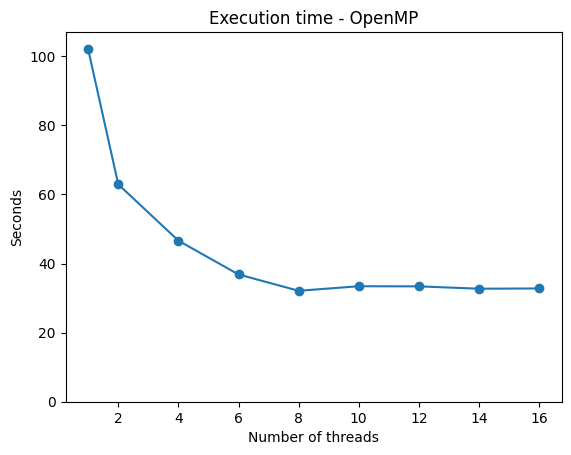

Lowest mean execution time: 32.111 obtained with 8 number of threads.


In [2]:
import matplotlib.pyplot as plt

x = list(threads2exec_time.keys())
y = list(threads2exec_time.values())

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Execution time - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Seconds')
plt.ylim(0, max(y)+5)

# Displaying the plot
plt.show()

print("Lowest mean execution time: {min_time:.3f} obtained with {threads} number of threads."
      .format(min_time = min(y), threads = min(threads2exec_time, key = threads2exec_time.get)))


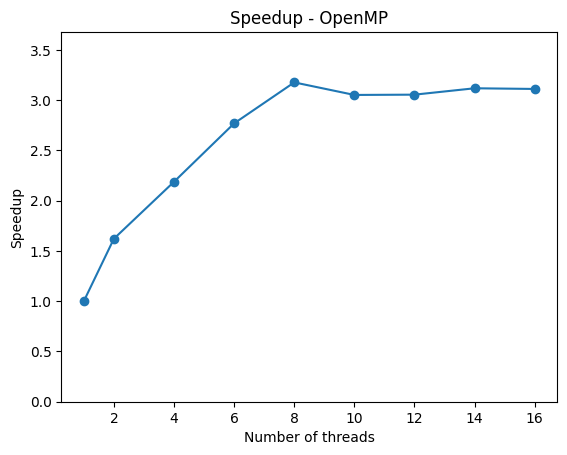

Max speedup: 3.176


In [3]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/value for value in threads2exec_time.values()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Speedup - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
plt.ylim(0, max(y)+0.5)

# Displaying the plot
plt.show()

print(f"Max speedup: {max(y):.3f}")

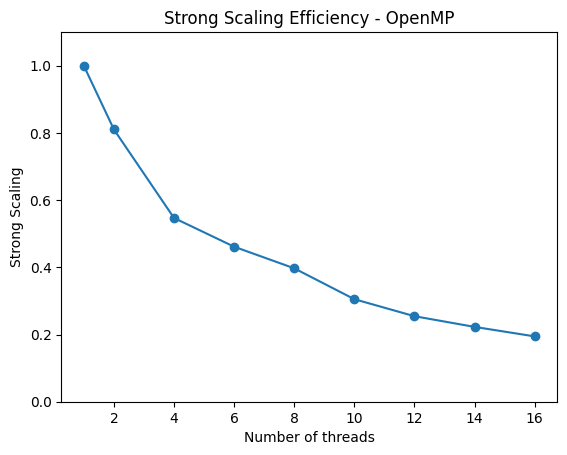

In [4]:
x = list(threads2exec_time.keys())
y = [threads2exec_time[1]/(p*value) for p, value in threads2exec_time.items()]

# Creating the plot
plt.plot(x, y, marker='o')

# Adding title and labels
plt.title('Strong Scaling Efficiency - OpenMP')
plt.xlabel('Number of threads')
plt.ylabel('Strong Scaling')
plt.ylim(0, max(y)+0.1)

# Displaying the plot
plt.show()